In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## question
- How does customer age and gender influence their purchasing behavior?
- Which generation shops the most?
- Are there discernible patterns in sales across different time periods?
- Which product categories hold the highest appeal among customers?
- What are the relationships between age, spending, and product preferences?
- How do customers adapt their shopping habits during seasonal trends?
- Are there distinct purchasing behaviors based on the number of items bought per transaction?
- What insights can be gleaned from the distribution of product prices within each category?

In [3]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [7]:
df.describe(include="all")

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,NaN,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,NaN,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,2023-07-03 00:25:55.200000256,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,NaN,NaN,64.00000,NaN,4.000000,500.000000,2000.000000


## Distribution of Numerical Values

<Figure size 1500x1000 with 0 Axes>

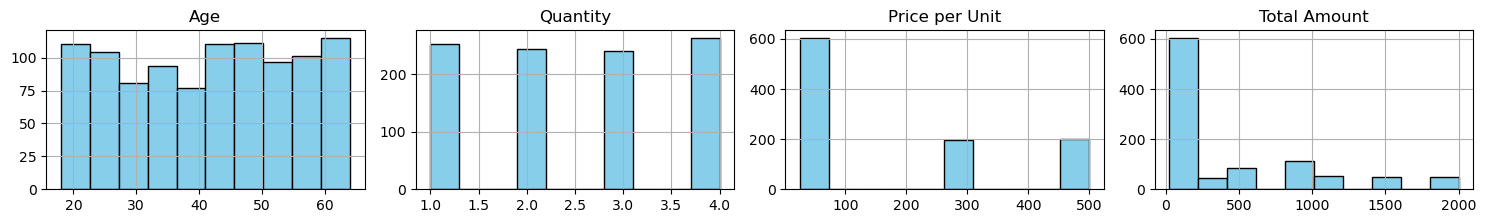

In [9]:
df_numerical = df.drop(columns=['Date', 'Transaction ID'])

plt.figure(figsize=(15,10))
df_numerical.hist(bins=10,figsize=(15,10),layout=(5,4),color="skyblue",edgecolor="black")
plt.tight_layout()
plt.show()

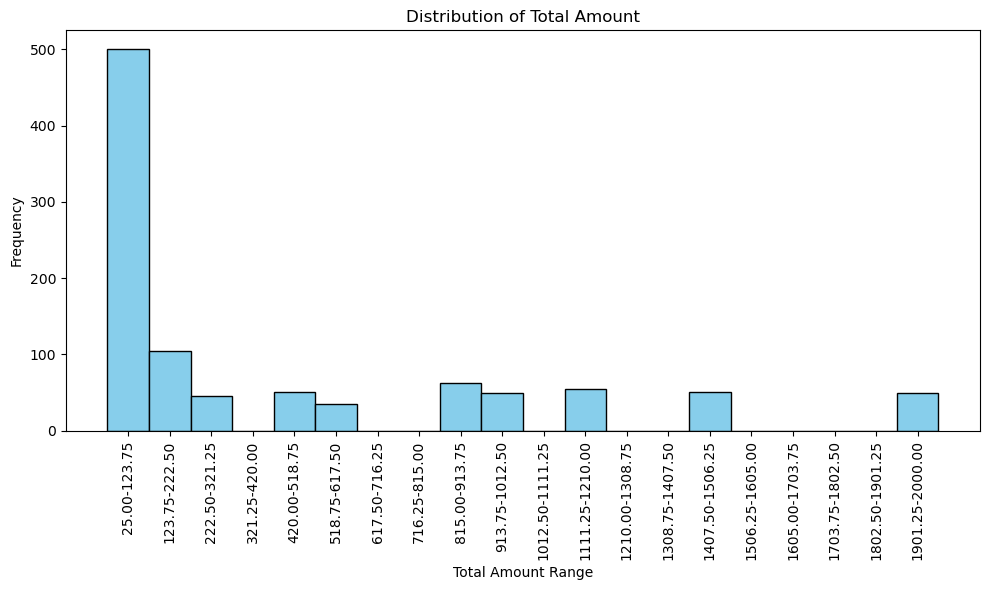

In [10]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df["Total Amount"], bins=20, color='skyblue', edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, labels=[f'{bins[i]:.2f}-{bins[i+1]:.2f}' for i in range(len(bins)-1)], rotation=90)
plt.title("Distribution of Total Amount")
plt.xlabel("Total Amount Range")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

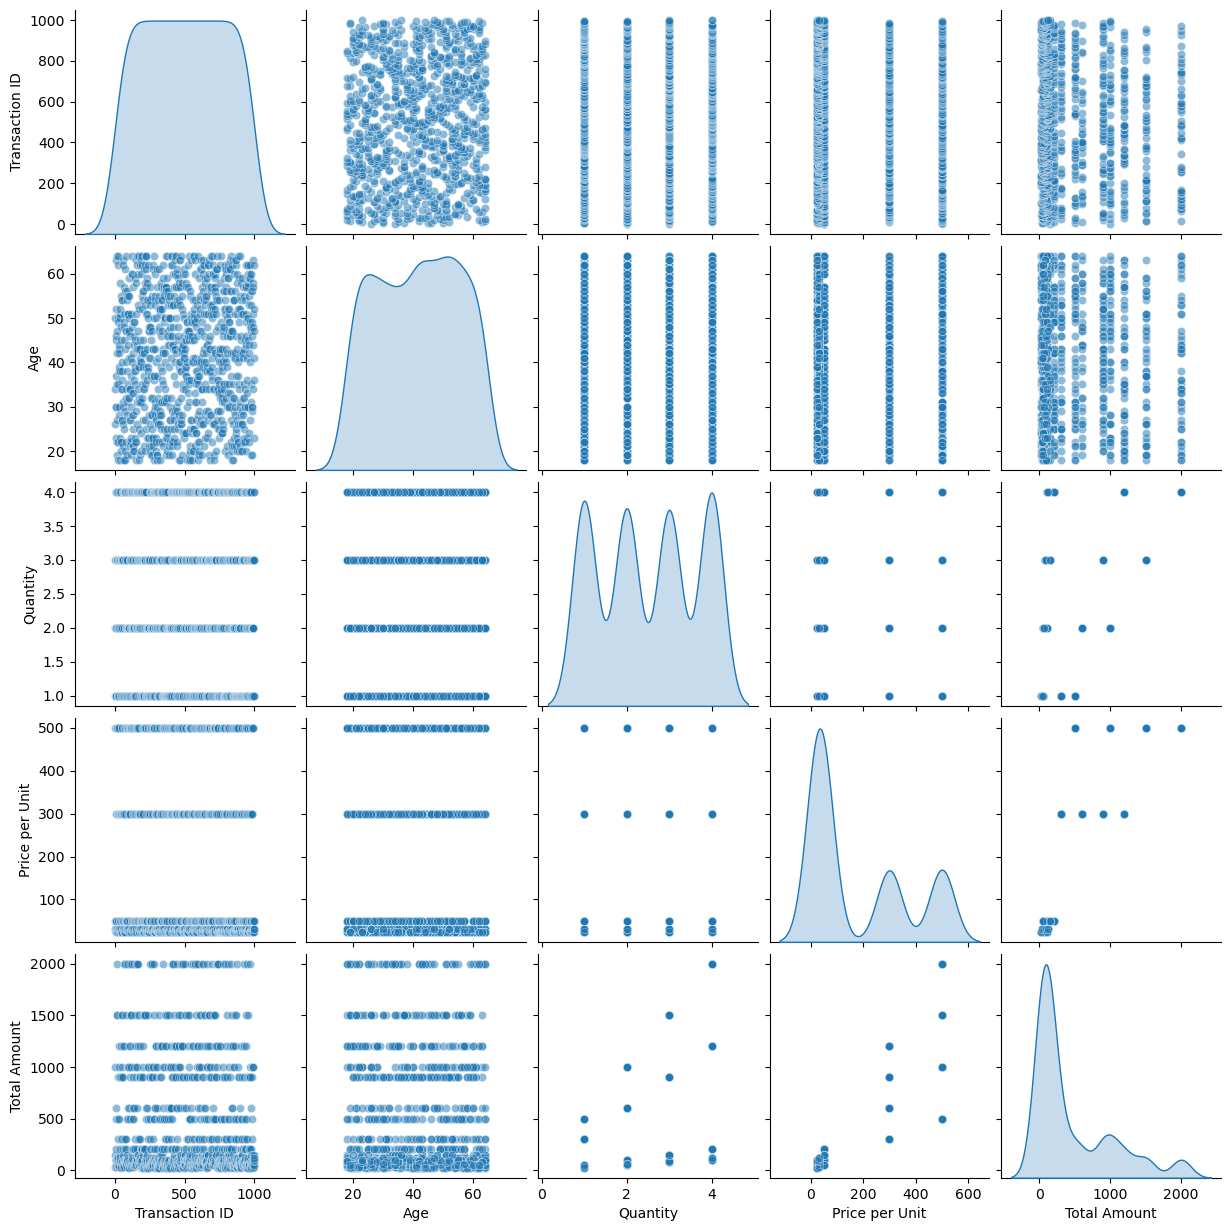

In [11]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

##### Based on the total spending data, it can be stated that the highest spending distribution among buyers falls within the range of 25 to 123.75.

### How does customer age and gender influence their purchasing behavior?


### What are the relationships between age, spending, and product preferences?

In [15]:
bins = [11,26,42,58,68]
labels = ["Gen Z","Millenial","Gen X","Boomers"]

df["Generation Group"] = pd.cut(df["Age"],bins = bins,labels = labels,right=True)

In [16]:
grouped_data = df.groupby(["Gender","Generation Group","Product Category"])["Total Amount"].sum().reset_index()

/var/folders/yy/vjlpnpfx4pqf49xz4hb6_trm0000gn/T/ipykernel_9469/3967990476.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(["Gender","Generation Group","Product Category"])["Total Amount"].sum().reset_index()


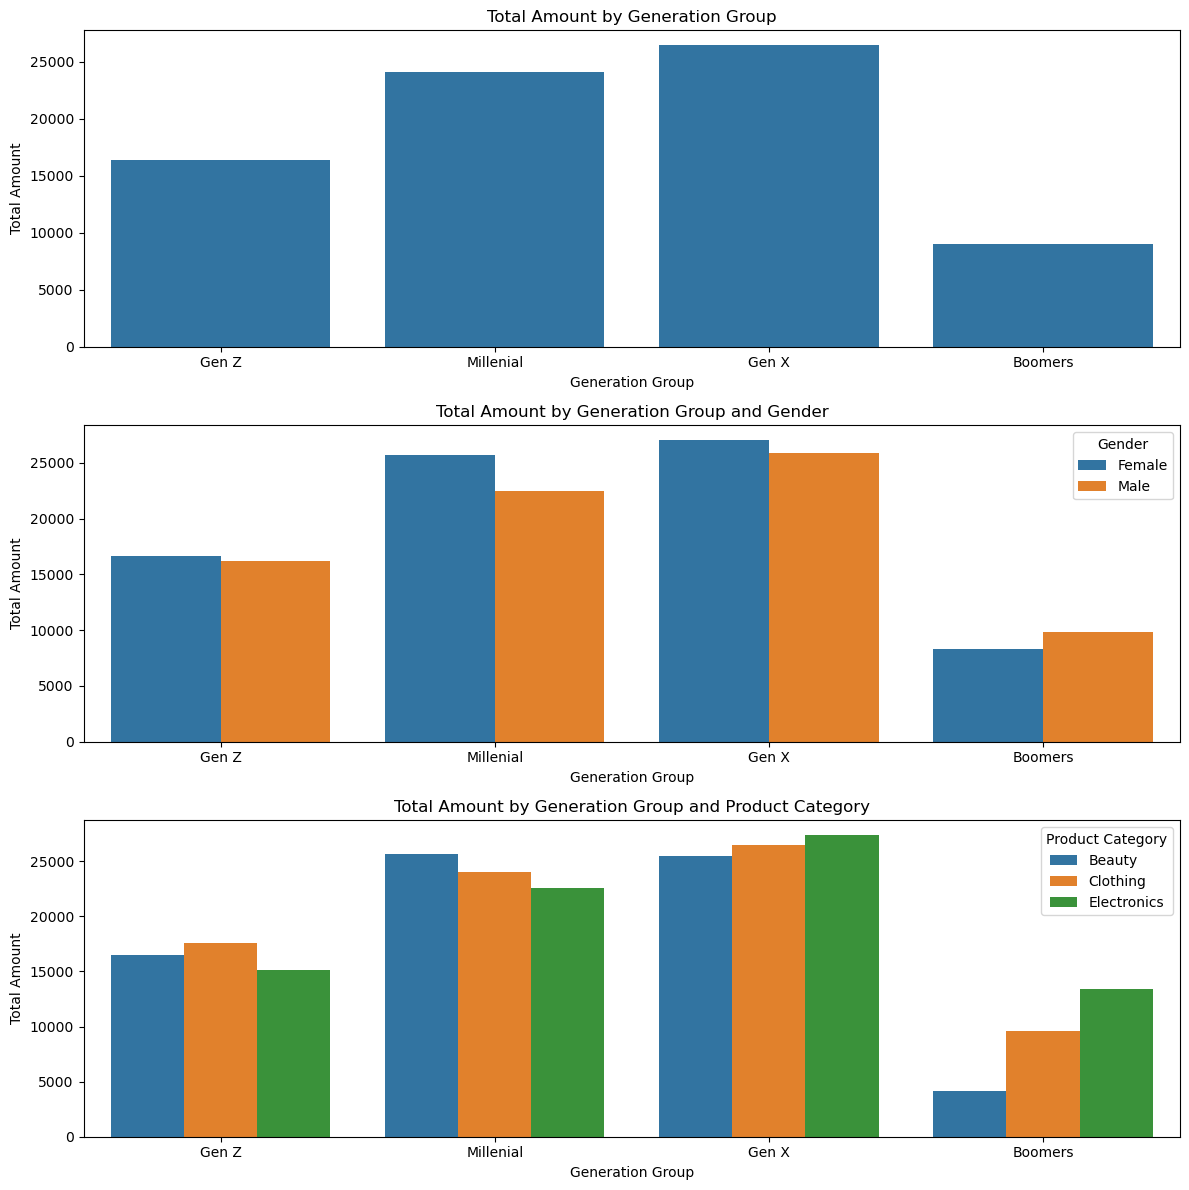

In [17]:
plt.figure(figsize=(12, 12))
plt.subplot(3,1,1)
plt.title("Total Amount by Generation Group")
sns.barplot(data=grouped_data, x="Generation Group", y="Total Amount", errorbar=None)
plt.subplot(3,1,2)
plt.title("Total Amount by Generation Group and Gender")
sns.barplot(data=grouped_data, x="Generation Group", y="Total Amount", hue="Gender", errorbar=None)
plt.subplot(3,1,3)
plt.title("Total Amount by Generation Group and Product Category")
sns.barplot(data=grouped_data, x="Generation Group", y="Total Amount", hue="Product Category", errorbar=None)
plt.tight_layout()
plt.show()

##### Generation X is the highest spender, closely followed by Millennials and then Generation Z. Meanwhile, Boomers contribute less to the overall spending. Total spending is fairly evenly distributed among various generations for certain product categories. Generation X has the highest total spending in electronics, Millennials in beauty products, and Generation Z in clothing, with spending distribution by category not differing significantly from that of Boomers. However, the Boomer generation shows a lower contribution to product spending compared to other generations, likely due to differences in preferences and shopping habits, as Boomers tend to prefer electronic products followed by over beauty product.

## Which generation shops the most?

/var/folders/yy/vjlpnpfx4pqf49xz4hb6_trm0000gn/T/ipykernel_9469/23135923.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shops_amount = df.groupby(["Generation Group","Gender"])["Transaction ID"].count().reset_index()


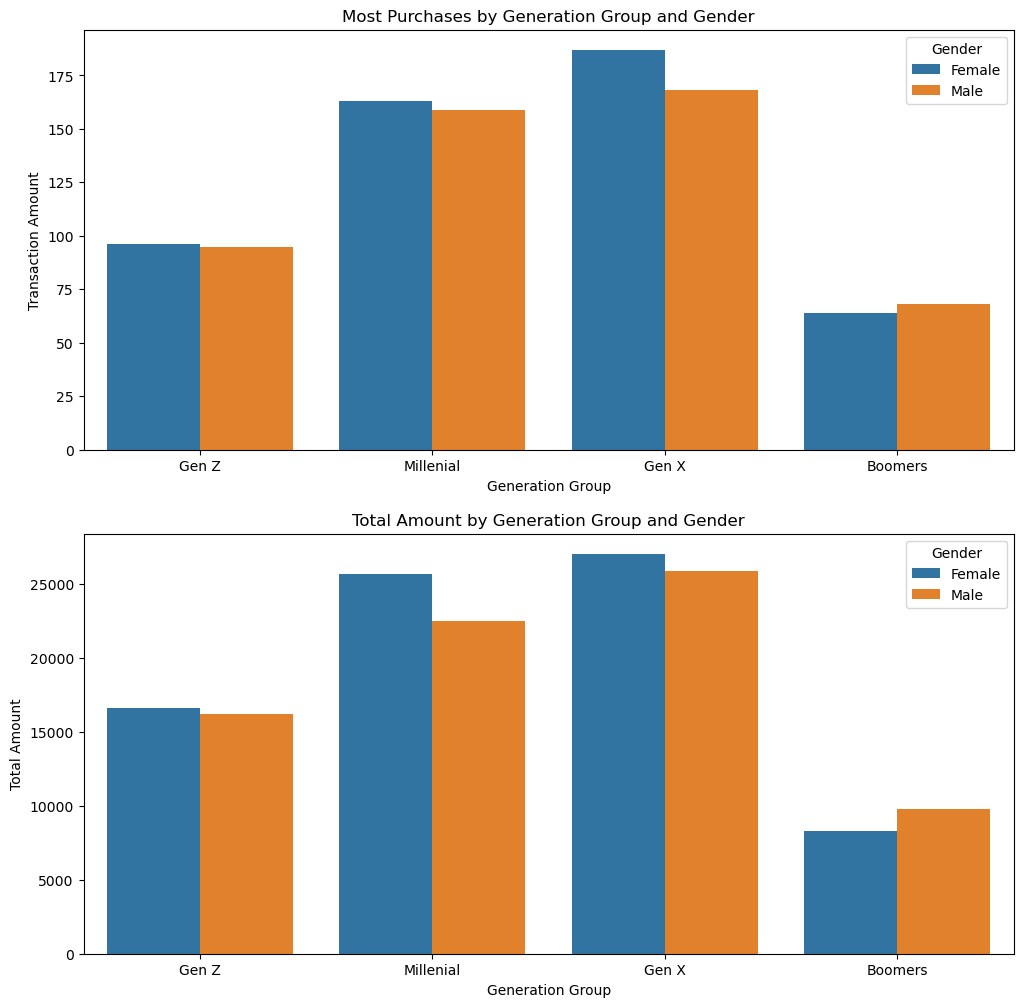

In [20]:
shops_amount = df.groupby(["Generation Group","Gender"])["Transaction ID"].count().reset_index()
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.barplot(data = shops_amount,x="Generation Group",y="Transaction ID",hue="Gender")
plt.title("Most Purchases by Generation Group and Gender")
plt.ylabel("Transaction Amount")
plt.subplot(2,1,2)
sns.barplot(data=grouped_data, x="Generation Group", y="Total Amount", hue="Gender", errorbar=None)
plt.title("Total Amount by Generation Group and Gender")
plt.show()

##### From the data, it can be concluded that Gen X women have the highest shopping frequency, followed by Millennial women. Additionally, Gen X men also spend more money in their shopping frequency. This indicates that while Gen X women shop most frequently, men from that generation tend to make purchases of higher value.

### Are there discernible patterns in sales across different time periods?

In [121]:
monthly_sales = df.groupby(["Date"]).agg({
    "Quantity": 'sum',
    "Total Amount": 'sum'
}).reset_index()
monthly_sales = monthly_sales[monthly_sales['Total Amount'] > 0]
monthly_sales['Date'] = pd.to_datetime(monthly_sales['Date']).dt.to_period('M')

In [123]:
monthly_grouped = monthly_sales.groupby(['Date']).agg({
    'Quantity': 'sum',
    'Total Amount': 'sum'
}).reset_index()
monthly_grouped

,Date,Quantity,Total Amount
0,2023-01,195,35450
1,2023-02,214,44060
2,2023-03,194,28990
3,2023-04,214,33870
4,2023-05,259,53150
5,2023-06,197,36715
6,2023-07,176,35465
7,2023-08,227,36960
8,2023-09,170,23620
9,2023-10,252,46580


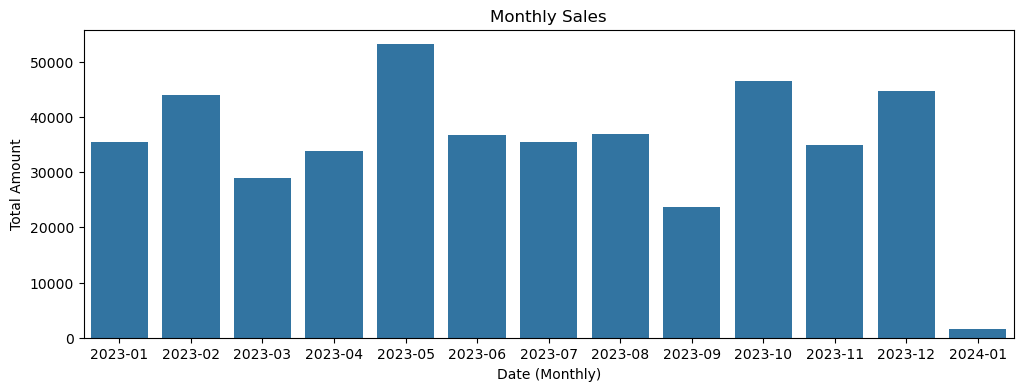

In [125]:
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_grouped,x="Date",y="Total Amount",errorbar=None)
plt.xlabel("Date (Monthly)")
plt.title("Monthly Sales")
plt.show()

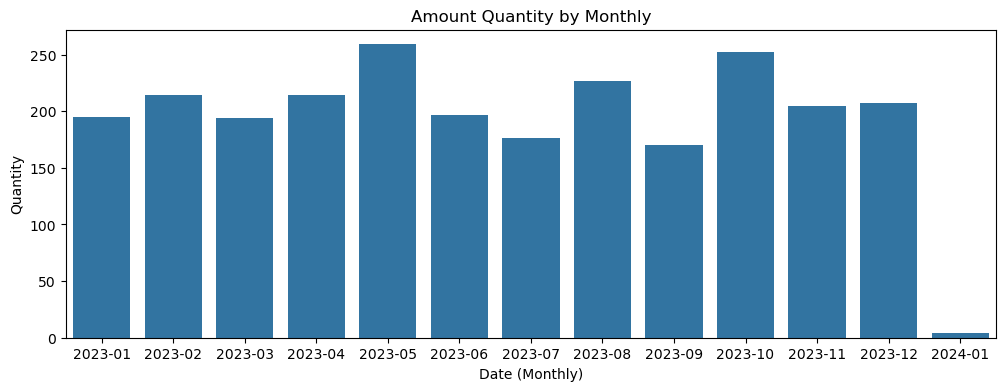

In [131]:
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_grouped,x="Date",y="Quantity",errorbar=None)
plt.xlabel("Date (Monthly)")
plt.title("Amount Quantity by Monthly")
plt.show()

In [ ]:
monthly_grouped["Product Category"] = df.groupby("Product Category")

/var/folders/yy/vjlpnpfx4pqf49xz4hb6_trm0000gn/T/ipykernel_9469/3841819251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales,x="Date",y="Total Amount",errorbar=None,palette="Set2")


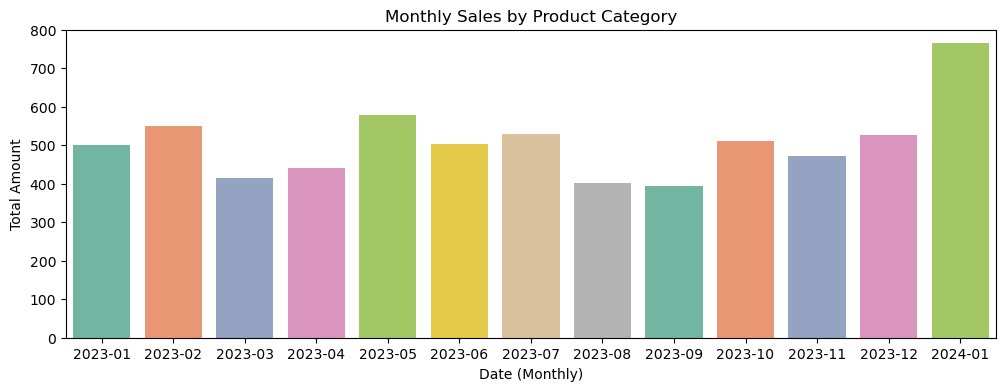

In [96]:
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_sales,x="Date",y="Total Amount",errorbar=None,palette="Set2")
plt.ylim(0, 800)
plt.xlabel("Date (Monthly)")
plt.title("Monthly Sales by Product Category")
plt.show()

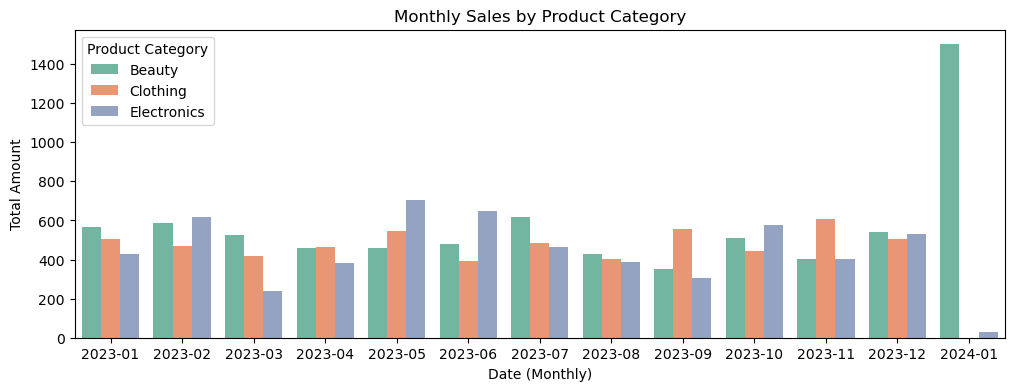

In [78]:

plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_sales,x="Date",y="Total Amount",errorbar=None,hue="Product Category",palette="Set2")
plt.xlabel("Date (Monthly)")
plt.title("Monthly Sales by Product Category")
plt.show()

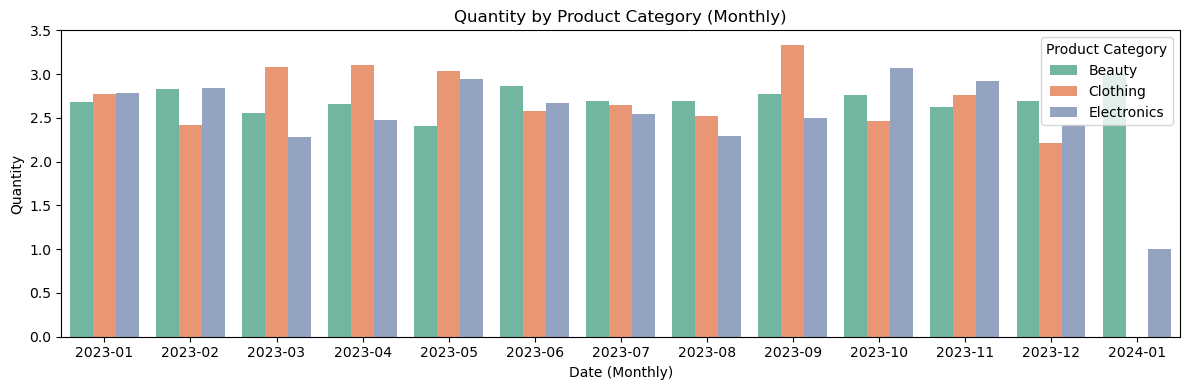

In [76]:
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_sales, x="Date", y="Quantity", errorbar=None, hue="Product Category", palette="Set2")

# Menyesuaikan label x-axis untuk tampil per bulan
plt.xlabel("Date (Monthly)")

# Menambahkan judul
plt.title("Quantity by Product Category (Monthly)")

plt.tight_layout()  # Supaya layout tidak terpotong
plt.show()

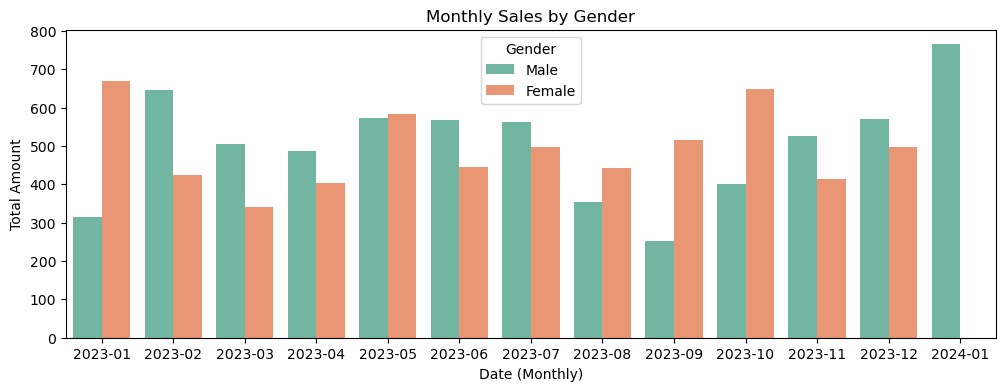

In [26]:
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_sales,x="Date",y="Total Amount",errorbar=None,hue="Gender",palette="Set2")
plt.xlabel("Date (Monthly)")
plt.title("Monthly Sales by Gender")
plt.show()

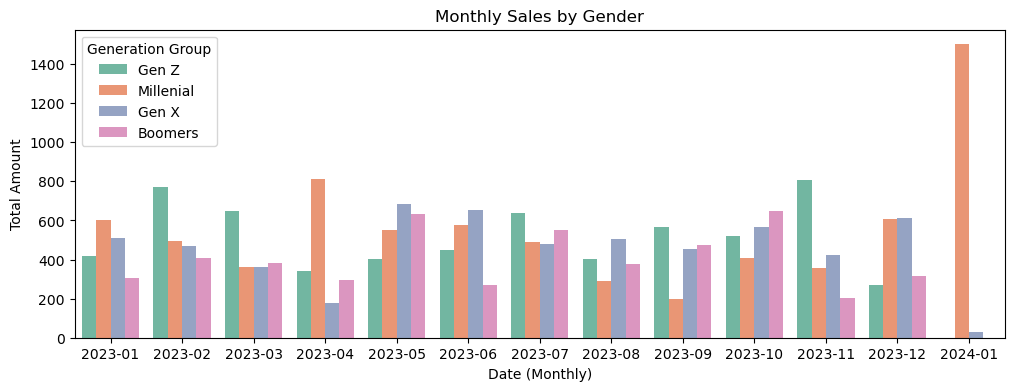

In [27]:
plt.figure(figsize=(12, 4))
sns.barplot(data=monthly_sales,x="Date",y="Total Amount",errorbar=None,hue="Generation Group",palette="Set2")
plt.xlabel("Date (Monthly)")
plt.title("Monthly Sales by Gender")
plt.show()

#####
In January 2024, there was a significant spike in purchases in the beauty product category, while other products were very sluggish, with no sales at all in the clothing category that month. All buyers in that month were men, with the most significant generation being millennials, which was very different from January 2023, where the majority were women. Meanwhile, there was also an increase in sales in July 2023. In September 2023, sales of clothing products experienced a sharp rise, which was not evident in the previous month. On the other hand, sales of beauty and technology products showed a significant decline in the same month. A similar trend occurred in November 2023, where sales of beauty and technology products again fell flat.

From the monthly data, it can be observed that significant shopping trends for Generation X began from May to December 2023, while millennials also saw a spike in April when other generations were sluggish in shopping.

In [141]:
daily_sales = df.groupby(['Date',"Gender"])['Total Amount'].sum().reset_index()
# plt.figure(figsize=(12, 4))
# sns.lineplot(data=daily_sales, x='Date', y='Total Amount',errorbar=None,hue="Generation Group",marker="o")
# plt.title('Daily Sales Trends by Generation Group', fontsize=16)
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Total Sales Amount', fontsize=14)
# plt.xticks(rotation=45)
# plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
# plt.tight_layout()
# plt.show()

##### 
The graph illustrates a highly variable sales pattern with occasional spikes in each product category. The data suggests that Electronics may have more significant one-off sales events, while Beauty and Clothing exhibit more consistent, though still fluctuating, sales trends.

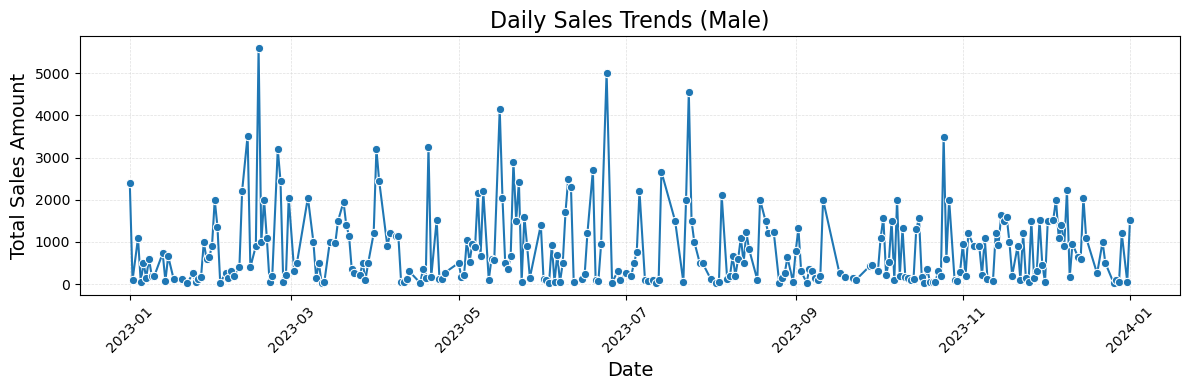

In [143]:

# Filter data hanya untuk gender laki-laki (Male)
male_sales = daily_sales[daily_sales['Gender'] == 'Male']

# Visualisasi tren penjualan harian berdasarkan gender laki-laki
plt.figure(figsize=(12, 4))
sns.lineplot(data=male_sales, x='Date', y='Total Amount', errorbar=None, marker="o")

# Menambahkan judul dan label
plt.title('Daily Sales Trends (Male)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=45)

# Menambahkan grid
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)

# Mengatur tata letak agar tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()


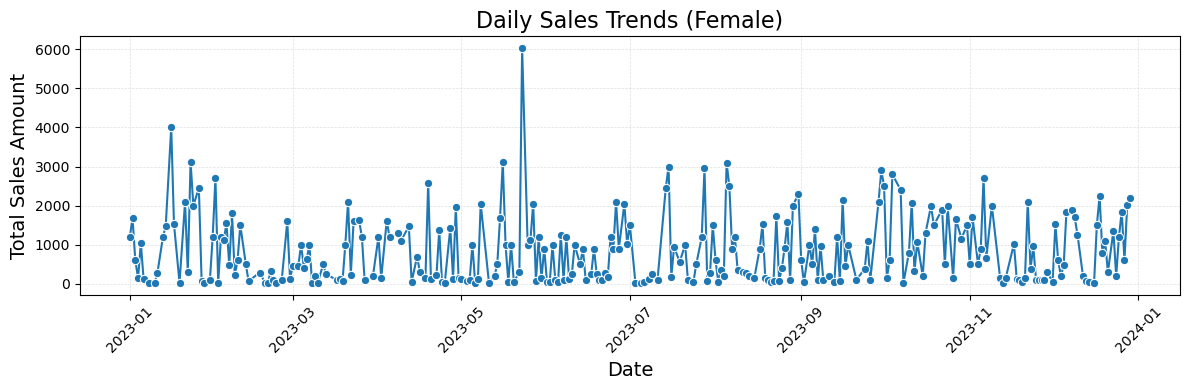

In [149]:

# Filter data hanya untuk gender laki-laki (Male)
female_sales = daily_sales[daily_sales['Gender'] == 'Female']

# Visualisasi tren penjualan harian berdasarkan gender laki-laki
plt.figure(figsize=(12, 4))
sns.lineplot(data=female_sales, x='Date', y='Total Amount', errorbar=None, marker="o")

# Menambahkan judul dan label
plt.title('Daily Sales Trends (Female)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=45)

# Menambahkan grid
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)

# Mengatur tata letak agar tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

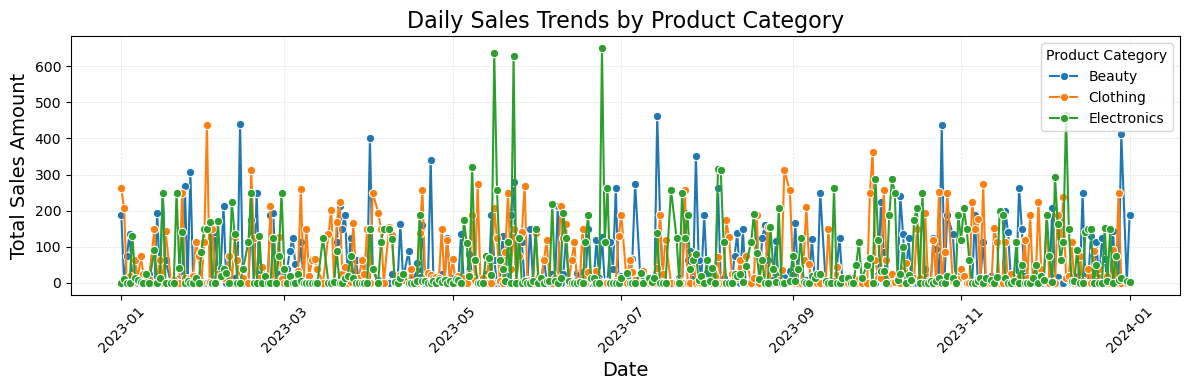

In [32]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=daily_sales, x='Date', y='Total Amount',errorbar=None,hue="Product Category",marker="o")
plt.title('Daily Sales Trends by Product Category', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

##### 
The spending distribution is mostly in the range of 0 - 200, with a noticeable spike in electronic purchases between May and July. However, during the same period, sales of Beauty products declined. Outside of this period, both before and after, Beauty product sales showed an increase. Additionally, trends reveal a notable difference in spending patterns between millennials and Gen X. While the total spending of Gen X is higher, their day-to-day spending is lower compared to millennials, yet their spending pattern is more stable. On the other hand, millennials tend to have less stable spending patterns, with certain days showing significantly higher spending compared to Gen X, who exhibit a more consistent approach to shopping.


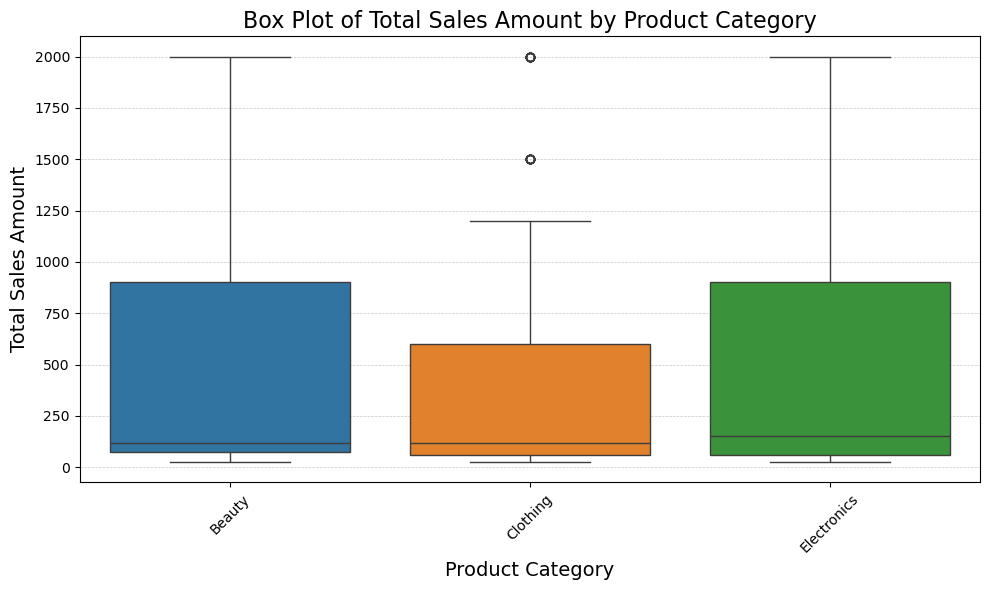

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product Category', y='Total Amount',hue="Product Category")
plt.title('Box Plot of Total Sales Amount by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
df_clothing = df[df["Product Category"] == "Clothing"]
df_filtered = df_clothing[df_clothing["Total Amount"] > 1250]
df_filtered.reset_index()

,index,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Generation Group
0,15,16,2023-02-17,CUST016,Male,19,Clothing,3,500,1500,Gen Z
1,77,78,2023-07-01,CUST078,Female,47,Clothing,3,500,1500,Gen X
2,111,112,2023-12-02,CUST112,Male,37,Clothing,3,500,1500,Millenial
3,114,115,2023-11-26,CUST115,Male,51,Clothing,3,500,1500,Gen X
4,123,124,2023-10-27,CUST124,Male,33,Clothing,4,500,2000,Millenial
5,165,166,2023-04-02,CUST166,Male,34,Clothing,4,500,2000,Millenial
6,211,212,2023-06-09,CUST212,Male,21,Clothing,3,500,1500,Gen Z
7,214,215,2023-11-29,CUST215,Male,58,Clothing,3,500,1500,Gen X
8,252,253,2023-08-31,CUST253,Female,53,Clothing,4,500,2000,Gen X
9,268,269,2023-02-01,CUST269,Male,25,Clothing,4,500,2000,Gen Z


##### 
There appears to be an outlier in the total spending for the "clothing" product category, with large spending amounts exceeding the range shown in the box plot. There are 30 data points with total spending above 1250. However, since this is a retail context, these outliers can actually provide valuable insights. Rather than viewing them as anomalies, these outliers may indicate high-value transactions or key customer segments that are important for business analysis.

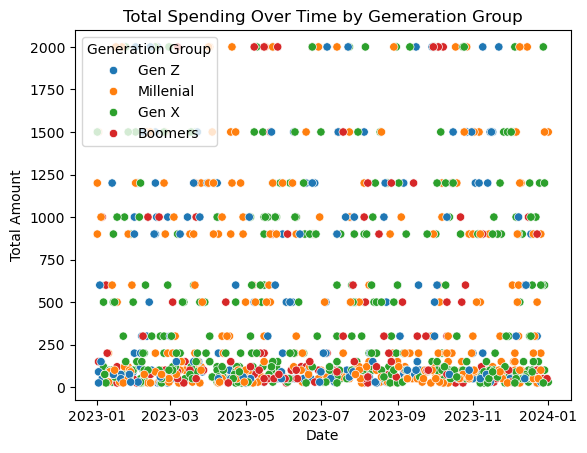

In [37]:
sns.scatterplot(x='Date', y='Total Amount', hue='Generation Group', data=df)
plt.title('Total Spending Over Time by Gemeration Group')
plt.show()

<Axes: >

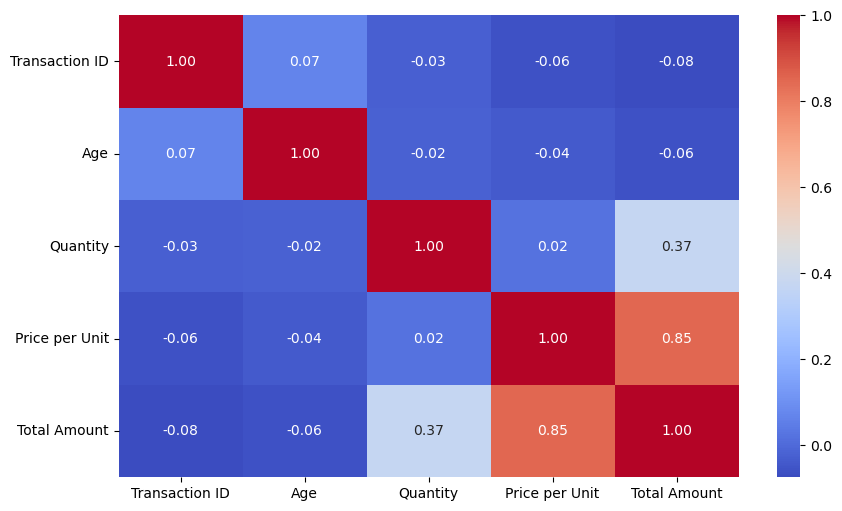

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True,fmt=".2f", cmap='coolwarm')

##### 
price per unit and total amount exhibit a very high correlation, followed by quantity. This makes sense, as the total spending is highly correlated with both the price per unit and the quantity of items purchased.however other column has tend to have a weak correlation